In [2]:
simPoisson <- function(T_, lambda)
{
  No_Intervalos = 1000 #Divisiones del intervalo
  dt <- T_/No_Intervalos #Intervalos pequeños que subdividen [0,T]
  p <- lambda * dt + 10^(-6)
  probabilidades <- c(1-p,p)
  vectorEventos <- c()
  vectorTiempo <- c()
  suma <- 0

  resultado <- 1
  for(k in 1:No_Intervalos-1)
  {
    if (resultado == 1)
    {
      suma <- suma + resultado
      vectorTiempo <- c(vectorTiempo, k*dt)
      vectorEventos <- c(vectorEventos,suma)
    }
    else
    {
      vectorTiempo <- c(vectorTiempo, k*dt)
      vectorEventos <- c(vectorEventos,suma)
    }

    resultado <- sample(0:1, size = 1 ,prob = probabilidades,
                      replace = T)

  }
  return(list(vt = vectorTiempo, ve = vectorEventos))
}

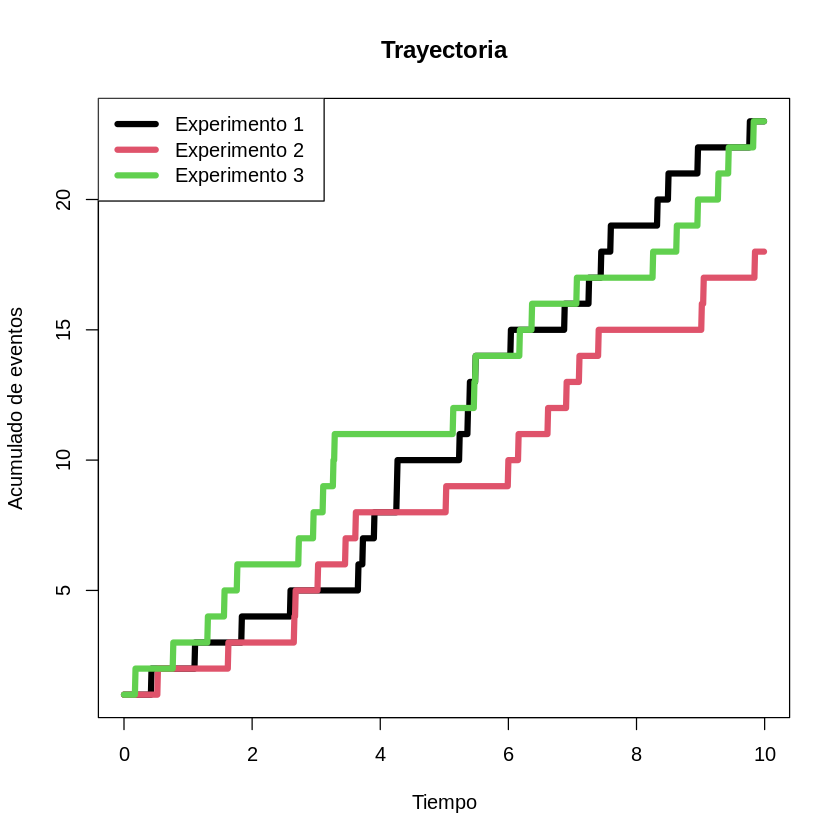

In [26]:
experimento1 <- simPoisson(10,2)
experimento2 <- simPoisson(10,2)
experimento3 <- simPoisson(10,2)

#Alternativa para x = seq(0,T,dt)
matplot(experimento1$vt, cbind(experimento1$ve,experimento2$ve,experimento3$ve),
        type = "l", xlab = "Tiempo", ylab = "Acumulado de eventos",
        main = "Trayectoria", pch = 19, lwd = 5, lty = 1)

legend("topleft", legend = c("Experimento 1", "Experimento 2", "Experimento 3"),
       col = 1:3, lty = 1, lwd = 5)

In [3]:
lambda <- 0.5
T_ <- 1
n_simulaciones <- 10^4
eventos <- c()
resultados <- list()

for (i in 1:n_simulaciones)
{
  sim <- simPoisson(T_, lambda)
  eventos <- c(eventos, max(sim$ve))
}

eventos <- subset(eventos, eventos != 0)

write.csv(eventos, file = "eventosPoisson.csv", row.names = FALSE)

In [ ]:
print(eventos)

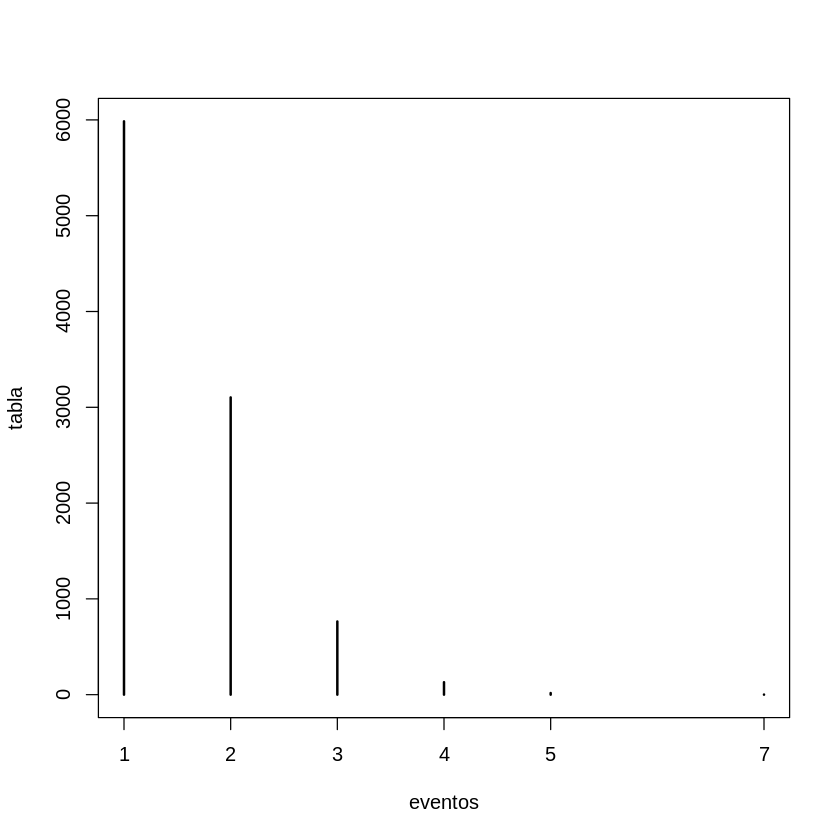

In [28]:
tabla <- table(eventos)

plot(tabla)

In [191]:
write.csv(tabla, file = "tablaPoisson.csv", row.names = FALSE)

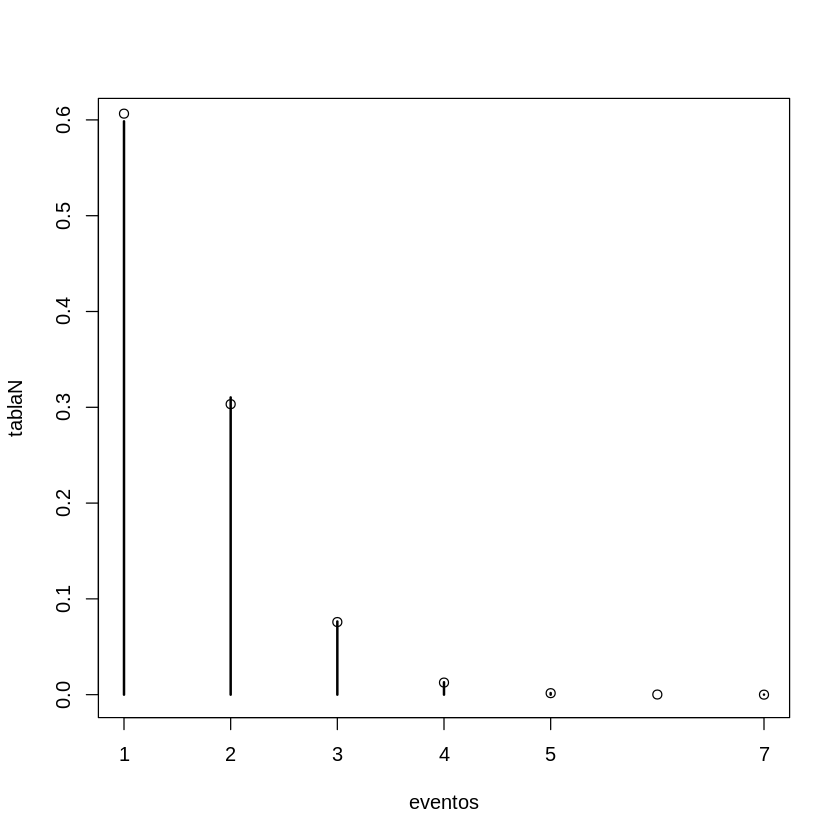

In [30]:
tablaN <- prop.table(tabla)
teorica <- dpois(0:6, lambda = 0.5)

plot(tablaN)
points(teorica)